# Importing necessary libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Define constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 25
NUM_CLASSES = 8

In [3]:
# Load dataset
def load_dataset(image_dir, label_dir):
    images, labels = [], []
    label_files = {file.split('.')[0]: file for file in os.listdir(label_dir)}
    
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, label_files.get(img_file.split('.')[0], ''))
        
        if os.path.exists(label_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMAGE_SIZE)
            img = img / 255.0
            
            with open(label_path, 'r') as file:
                label = int(file.readline().strip().split()[0])  # Read first label
                
            images.append(img)
            labels.append(label)
    
    return np.array(images), np.array(labels)

In [21]:

# Load train and validation data
train_images, train_labels = load_dataset("dataset/train/images", "dataset/train/labels")
val_images, val_labels = load_dataset("dataset/valid/images", "dataset/valid/labels")

In [22]:
# Split train data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [23]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [24]:
# CNN Model Architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
# Train model
model = create_model()
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS)

c:\Users\adity\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\adity\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1089 - loss: 2.1322 - val_accuracy: 0.1111 - val_loss: 2.0842
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1121 - loss: 2.0814 - val_accuracy: 0.0794 - val_loss: 2.0800
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1390 - loss: 2.0790 - val_accuracy: 0.0794 - val_loss: 2.0807
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.1460 - loss: 2.0790 - val_accuracy: 0.0794 - val_loss: 2.0812
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1424 - loss: 2.0785 - val_accuracy: 0.0794 - val_loss: 2.0816
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1493 - loss: 2.0784 - val_accuracy: 0.0794 - val_loss: 2.0823
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.1367 - loss: 2.0801 - val_accuracy: 0.0794 - val_loss: 2.0821
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.1285 - loss: 2.0782 - val_accuracy: 0.0794 - val_loss:

In [26]:
# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step
              precision    recall  f1-score   support

           0       0.05      0.27      0.08        15
           1       0.00      0.00      0.00        28
           2       0.11      0.14      0.12        22
           3       0.42      0.74      0.53        27
           4       0.40      0.07      0.12        27
           5       0.40      0.08      0.13        26
           6       0.67      0.07      0.12        30
           7       0.29      0.36      0.32        14

    accuracy                           0.20       189
   macro avg       0.29      0.21      0.18       189
weighted avg       0.32      0.20      0.18       189



c:\Users\adity\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adity\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adity\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Save the trained model
model.save("cnn_unwanted_pose.h5")

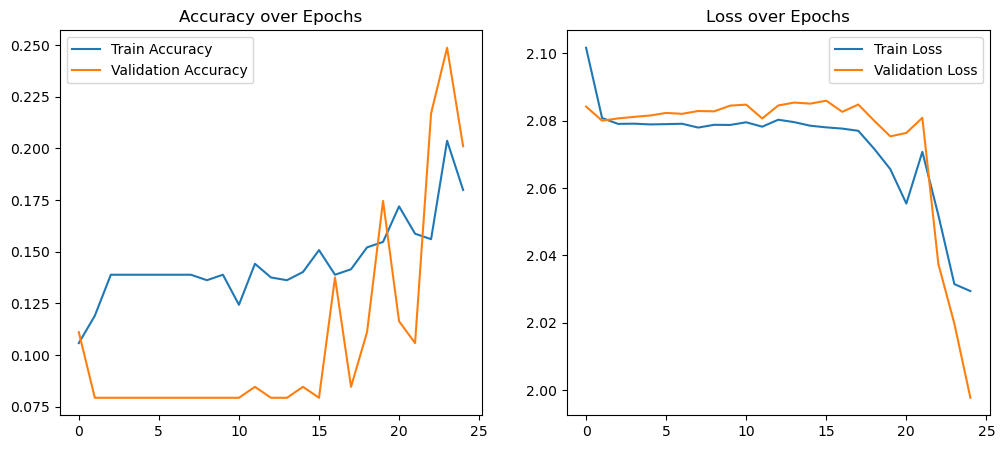

In [29]:
# Visualization of accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [30]:
# Alert system
def generate_alert(predicted_class):
    alert_classes = [1, 2, 3, 4, 5, 6, 7]  # Unwanted poses
    if predicted_class in alert_classes:
        print("⚠️ ALERT: Unwanted Pose Detected! ⚠️")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


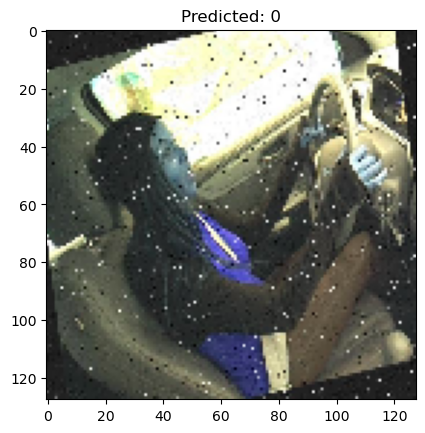

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


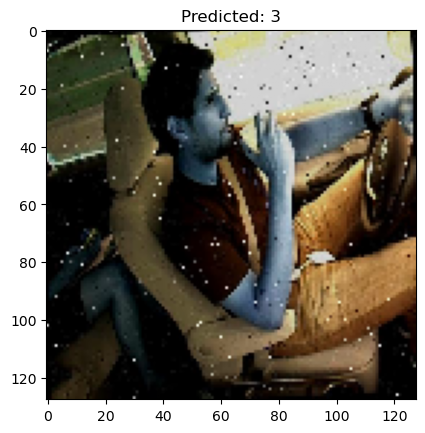

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


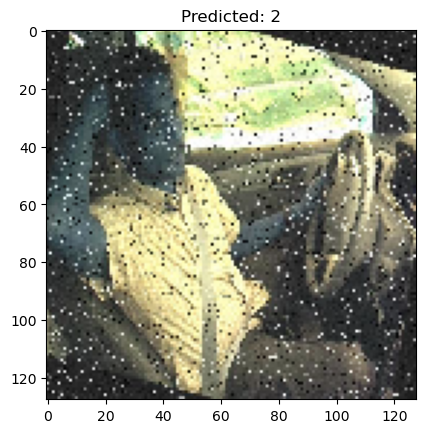

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


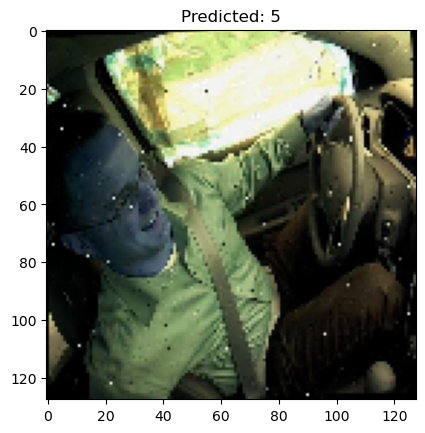

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


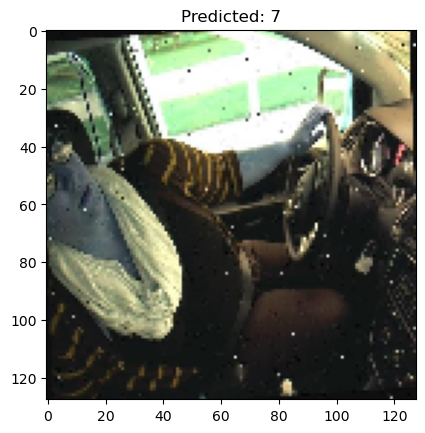

In [31]:
# Testing with sample images
for i in range(5):
    sample_img = X_test[i]
    pred_class = np.argmax(model.predict(sample_img.reshape(1, 128, 128, 3)))
    generate_alert(pred_class)
    plt.imshow(sample_img)
    plt.title(f"Predicted: {pred_class}")
    plt.show()